# Exercise 

<b> Exercise: Build decision tree model to predict survival based on certain parameters </b>
<img src="titanic.jpg" alt="Image Alt Text" width="500"/>

<b> In this file using following columns build a model to predict if person would survive or not </b>
1. Pclass
2. Sex
3. Age
4. Fare

<b>Calculate score of your model </b>

In [510]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix

In [511]:
data = pd.read_csv("C:\\Users\\User\\OneDrive\\Documents\\Faiz Khan Program\\Machine Learning\\ML with codebasics\\titanic.csv")

In [512]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,8,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C148,C


In [513]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis

### Checking Distribution of each columns 

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

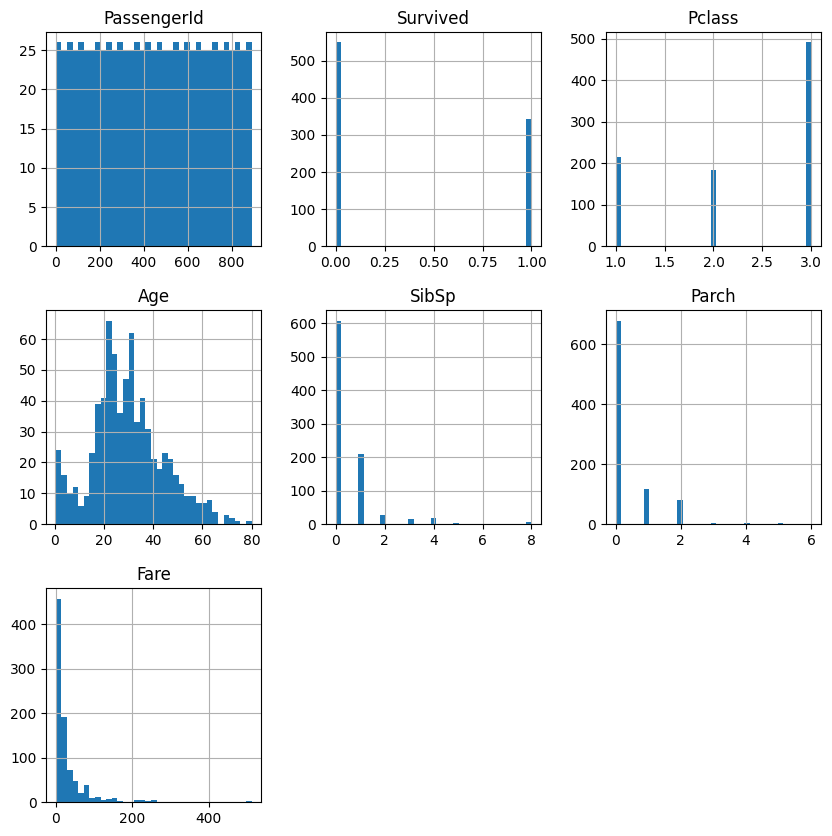

In [514]:
data.hist(bins=35, figsize=(10,10))

SibSp (how many siblings & spouses of the passenger aboard the Titanic)

Parch (Number of Parents/Children Aboard)

By analyzing above using some common sense, we can conclude that:

1. <p style="color:red">PassengerId, SibSp and Parch doesnt really have much impact so we ignore them</p>
2. Most of the Passengers are between age 20 to 40
3. Most passenger are of 3 Pclass



### Pclass vs Survived

<Axes: xlabel='Pclass'>

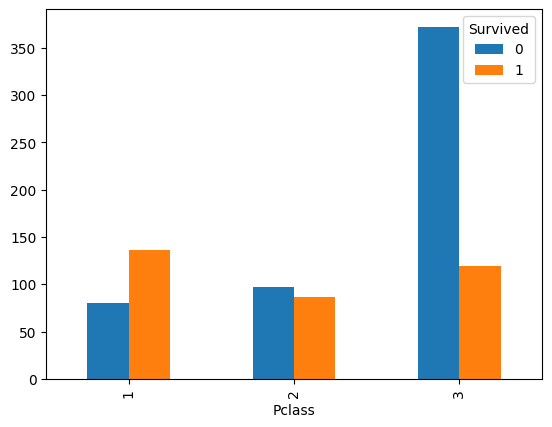

In [515]:
pd.crosstab(data['Pclass'], data['Survived']).plot(kind="bar")

In [516]:
pd.unique(data['Pclass'])

array([3, 1, 2], dtype=int64)

Text(0.5, 1.0, 'Non Survived Passenger')

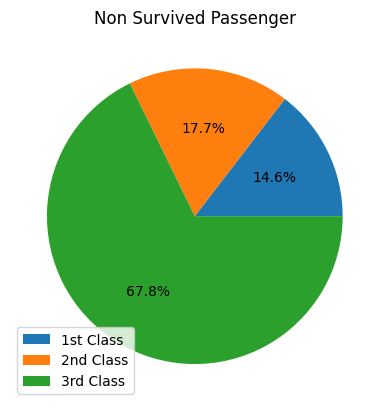

In [517]:
nonsurvived = data[data['Survived'] == 0]
n_pclass1 = nonsurvived[nonsurvived['Pclass'] == 1].shape[0]
n_pclass2 = nonsurvived[nonsurvived['Pclass'] == 2].shape[0]
n_pclass3 = nonsurvived[nonsurvived['Pclass'] == 3].shape[0]

plt.pie([n_pclass1, n_pclass2, n_pclass3], autopct="%1.1f%%")
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.title("Non Survived Passenger")

Text(0.5, 1.0, 'Survived Passenger')

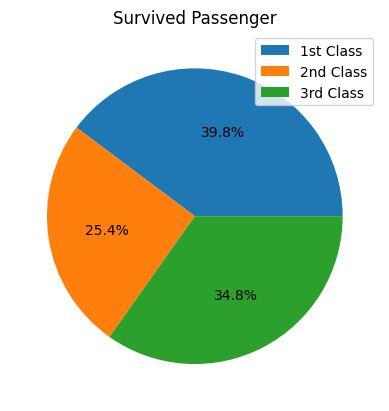

In [518]:
survived = data[data['Survived'] == 1]
s_pclass1 = survived[survived['Pclass'] == 1].shape[0]
s_pclass2 = survived[survived['Pclass'] == 2].shape[0]
s_pclass3 = survived[survived['Pclass'] == 3].shape[0]

plt.pie([s_pclass1, s_pclass2, s_pclass3], autopct="%1.1f%%")
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.title("Survived Passenger")

#### From above Bar chart and 2 Pie chart we can conclude that:
1. Most of the people who didnt survive were of 3rd class 
2. Passenger in 1st Class are more likely to Survive

<p style="color:green">So, Pclass column does have impact so we will use it</p>

### Analyzing Age column

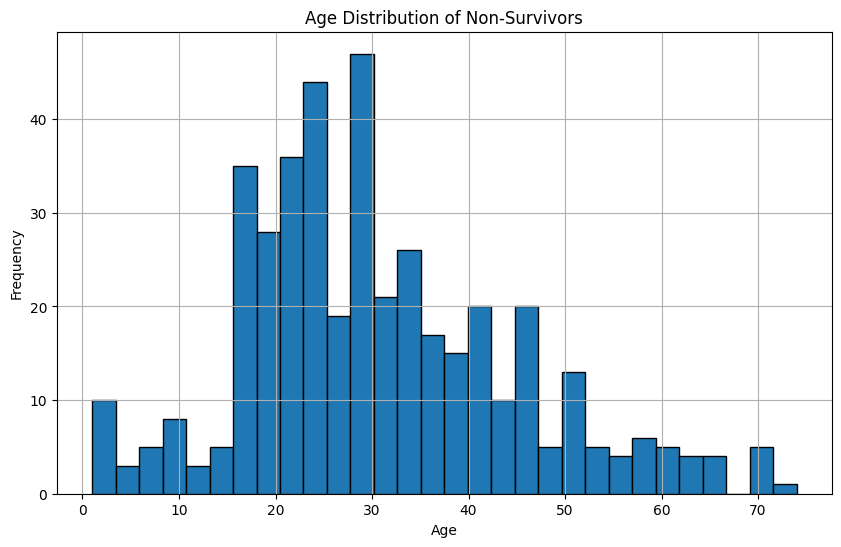

In [519]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(nonsurvived['Age'], bins=30, edgecolor='k')
plt.title('Age Distribution of Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

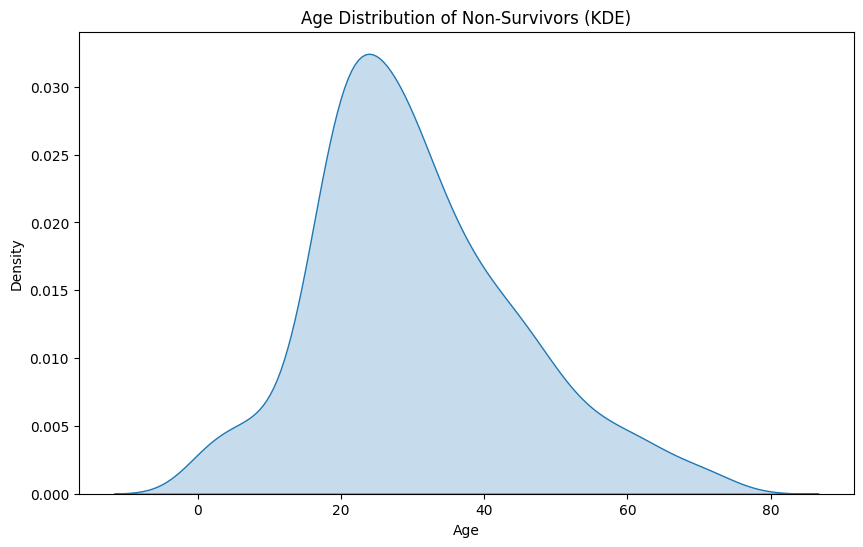

In [520]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(nonsurvived['Age'], fill=True)
plt.title('Age Distribution of Non-Survivors (KDE)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


In [521]:
print("Average ages of non Survival based on PClass")
print(f"Average age of 1 class {int(np.mean(data[ (data['Survived']==0) & (data['Pclass']==1) ]['Age']))}")
print(f"Average age of 2 class {int(np.mean(data[ (data['Survived']==0) & (data['Pclass']==2) ]['Age']))}")
print(f"Average age of 3 class {int(np.mean(data[ (data['Survived']==0) & (data['Pclass']==3) ]['Age']))}")

Average ages of non Survival based on PClass
Average age of 1 class 43
Average age of 2 class 33
Average age of 3 class 26


In [522]:
old_survival = (data[ (data['Age'] >= 60) & (data['Survived']==0) ].shape[0] / data[data['Age'] >= 60].shape[0]) * 100
print(f"Passenger above 60 who didn't survived: {old_survival:.2f}%")


Passenger above 60 who didn't survived: 73.08%


In [523]:
children_surv = (data[ (data['Age'] <= 18) & (data['Survived']==0) ].shape[0] / data[data['Age'] <= 18].shape[0]) * 100
print(f"Passenger below 18 who didn't survived: {children_surv:.2f}%")

Passenger below 18 who didn't survived: 49.64%


#### From Above charts and analysis we can conclude that:
1. Adults between the age of 20 to 40 have higher mortality rate
2. 73% of passenger above 60 years didn't survive meaning there is high mortality rate for old passengers

<p style="color:green">So, Age column does have some impact so we will use it as well</p>

### Analyzing Sex Column

<Axes: xlabel='Sex'>

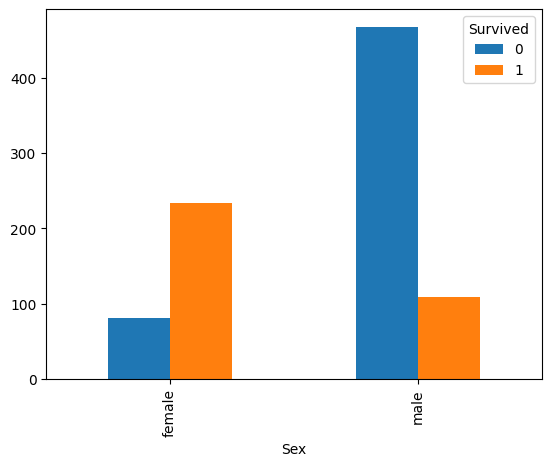

In [524]:
pd.crosstab(data['Sex'], data['Survived']).plot(kind="bar")

#### From above chart we can conclude that:

1. Females have significantly higher survival rates compared to males, it suggests that gender played a crucial role in survival.

<p style="color:green">So, Sex column does have impact so we will use it</p>

## Overall Conclusions

1. Most of the people who didnt survive were of 3rd class 
2. Passenger who pay more Fare, hence those in 1st Class are more likely to Survive
3. Adults between the age of 20 to 40 have higher mortality rate
4. 73% of passenger above 60 years didn't survive meaning there is high mortality rate for old passengers
5. Females have significantly higher survival rates compared to males, it suggests that gender played a crucial role in survival.
6. With Common Sense and some Analysis, we can safely ignore PassengerId, Name, SibSp, Parch, Ticket, Cabin and Embarked columns since it doesnt make sense to include them for our ML Predictions
7. So hence, Useful columns are : Pclass, Age, Sex and Fare with Survived being our Target column

# Data Preprocessing

### Dealing with null values

In [525]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [526]:
data['Age'].fillna(data['Age'].median(), inplace=True)

Drop Cabin columns since imputation may not be reliable due to the high proportion of missing values.

In [527]:
data.drop(['Cabin'], axis=1, inplace=True)

In [528]:
data.dropna(subset=['Embarked'], inplace=True)

In [529]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Dealing with Duplicates

In [530]:
data['Name'].duplicated().sum()

0

### Dealing with Outliers

(array([457., 191.,  72.,  48.,  21.,  37.,  10.,  11.,   4.,   7.,   9.,
          2.,   0.,   0.,   4.,   5.,   2.,   6.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   3.]),
 array([  0.        ,  14.63797714,  29.27595429,  43.91393143,
         58.55190857,  73.18988571,  87.82786286, 102.46584   ,
        117.10381714, 131.74179429, 146.37977143, 161.01774857,
        175.65572571, 190.29370286, 204.93168   , 219.56965714,
        234.20763429, 248.84561143, 263.48358857, 278.12156571,
        292.75954286, 307.39752   , 322.03549714, 336.67347429,
        351.31145143, 365.94942857, 380.58740571, 395.22538286,
        409.86336   , 424.50133714, 439.13931429, 453.77729143,
        468.41526857, 483.05324571, 497.69122286, 512.3292    ]),
 <BarContainer object of 35 artists>)

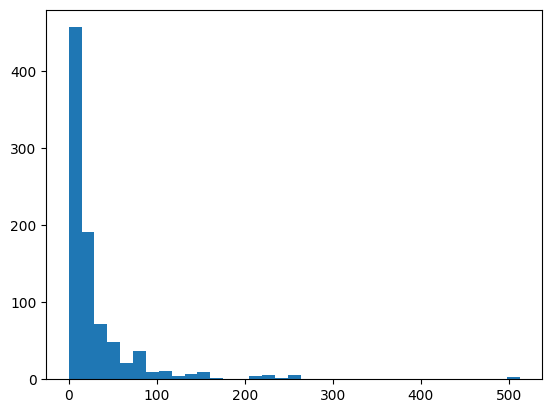

In [531]:
plt.hist(data['Fare'], bins=35)

In [532]:
data[data['Fare'] > 270 ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512,C


We can see there are 3 outliers with significant Fare value, so we drop them

In [533]:
# Filter the DataFrame to include only rows where 'Fare' is greater than 270
rows_to_delete = data[data['Fare'] > 270].index

# Drop the rows using their index
data.drop(rows_to_delete, inplace=True)

# Machine Learning 

In [534]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,8,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,W./C. 6607,23,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C


In [535]:
data[data['Pclass'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [536]:
X = data.drop(['PassengerId', 'Survived', 'Name', 'SibSp', 'Parch', 'Ticket', 'Embarked'], axis=1)
y = data['Survived']

### OneHotEncoding

In [537]:
X

,Pclass,Sex,Age,Fare
0,3,male,22,7
1,1,female,38,71
2,3,female,26,8
3,1,female,35,53
4,3,male,35,8
...,...,...,...,...
886,2,male,27,13
887,1,female,19,30
888,3,female,28,23
889,1,male,26,30


In [538]:
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(X[['Sex']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Sex']))
encoded_df

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
881,0,1
882,1,0
883,1,0
884,0,1


In [558]:
X.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)
newX = pd.concat([X, encoded_df], axis=1)

In [575]:
newX.drop(['Sex'], axis=1, inplace=True)

In [577]:
newX

,Pclass,Age,Fare,Sex_female,Sex_male
0,3,22,7,0,1
1,1,38,71,1,0
2,3,26,8,1,0
3,1,35,53,1,0
4,3,35,8,0,1
...,...,...,...,...,...
881,2,27,13,0,1
882,1,19,30,1,0
883,3,28,23,1,0
884,1,26,30,0,1


### X and y splitting

In [585]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(newX, y, test_size=0.2)

In [590]:
X_train

,Pclass,Age,Fare,Sex_female,Sex_male
50,3,7,40,0,1
337,1,45,36,0,1
261,1,40,0,0,1
771,3,18,8,0,1
450,1,30,28,0,1
...,...,...,...,...,...
89,3,29,8,0,1
420,3,29,8,0,1
576,3,28,14,1,0
770,2,54,23,1,0


### Model Training

In [622]:
model = DecisionTreeClassifier(criterion="gini")
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [623]:
model.score(X_test, y_test)

0.7584269662921348

In [624]:
predict = model.predict(X_test)

Text(95.72222222222221, 0.5, 'Actual')

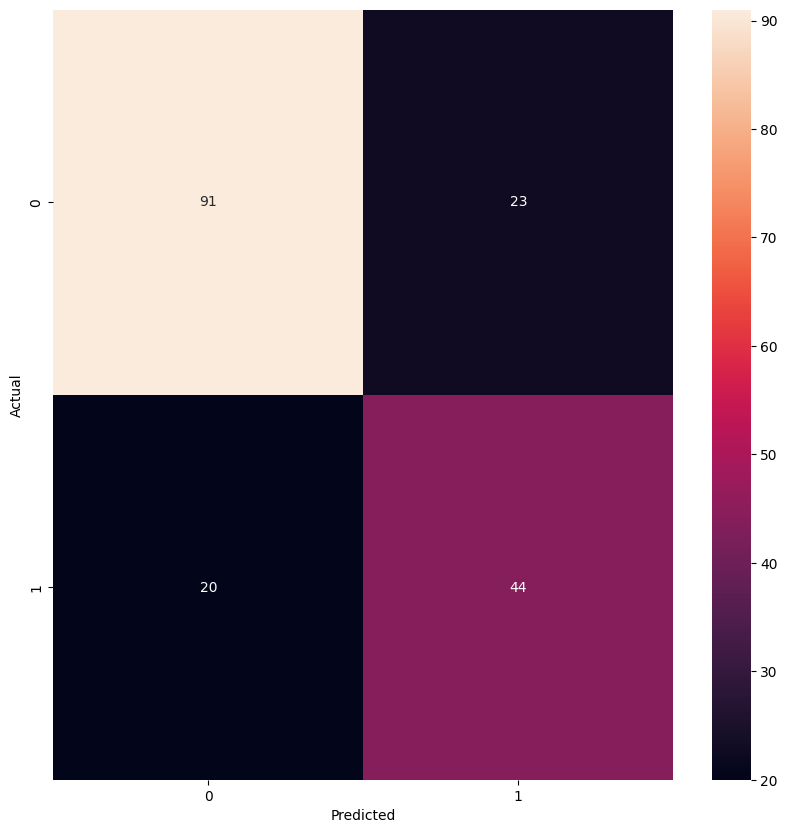

In [625]:
import seaborn as sn
cm = confusion_matrix(y_test, predict)
plt.figure(figsize=(10,10))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [627]:
print(f"Num of wrong predictions {np.sum(y_test != predict)}")

Num of wrong predictions 43
